## Multiple Regression

In [1]:
# Importing the libraries

import pandas as pd
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy

In [2]:
# Importing the dataset - csv file is in the respository (or http://54.243.252.9/engr-1330-webroot/8-Labs/Lab29/Lab29.html)

df = pd.read_csv(r"C:\Users\somil\Downloads\heart.data_\heart.data.csv")
data = torch.from_numpy(df.values)

In [3]:
# Preparing the data

X = data[:,1:3]
y = data[:,3].unsqueeze(dim = 1)

Text(0, 0.5, 'Heart disease')

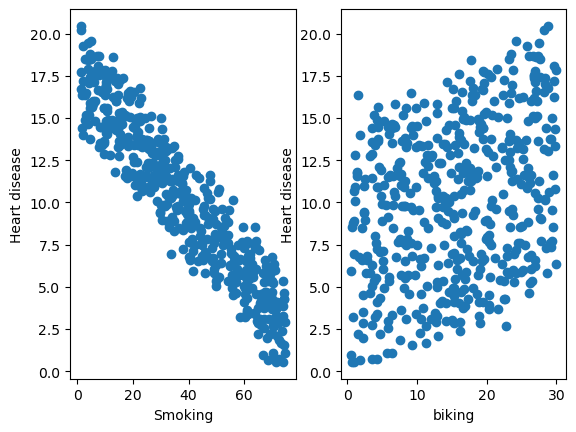

In [4]:
# Visualzising the data

plt.subplot(1,2,1)
plt.scatter(X[:,0], y)
plt.xlabel("Smoking")
plt.ylabel("Heart disease")

plt.subplot(1,2,2)
plt.scatter(X[:,1], y)
plt.xlabel("biking")
plt.ylabel("Heart disease")

In [5]:
# Splitting into training and test dataset

X_train = X[:int(len(X)*0.7),:]
y_train = y[:int(len(X)*0.7)]
X_test = X[int(len(X)*0.7):,:]
y_test = y[int(len(X)*0.7):]

In [6]:
# Checking the length and shape of splits
len(X_train), len(y_train), len(X_test), len(y_test), X_train.shape, y_train.shape, X_test.shape, y_test.shape

(348,
 348,
 150,
 150,
 torch.Size([348, 2]),
 torch.Size([348, 1]),
 torch.Size([150, 2]),
 torch.Size([150, 1]))

In [7]:
# Creating the regression model

class MultipleRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(2, 1,dtype = torch.float64)
    def forward(self, X: torch.Tensor)->torch.Tensor:
        return self.linear(X);

In [8]:
# Initialising the model

model_0 = MultipleRegressionModel()

In [9]:
# Checking Model_0 parameters

model_0.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.3083,  0.1293]], dtype=torch.float64)),
             ('linear.bias', tensor([-0.6053], dtype=torch.float64))])

In [10]:
# Setting lossfn and optimizer

# L1Loss because it's regression
loss_fn = nn.L1Loss()

# Tried and tested, Adam was converging faster than SGD
optimizer = torch.optim.Adam(params = model_0.parameters(),
                            lr = 0.1)

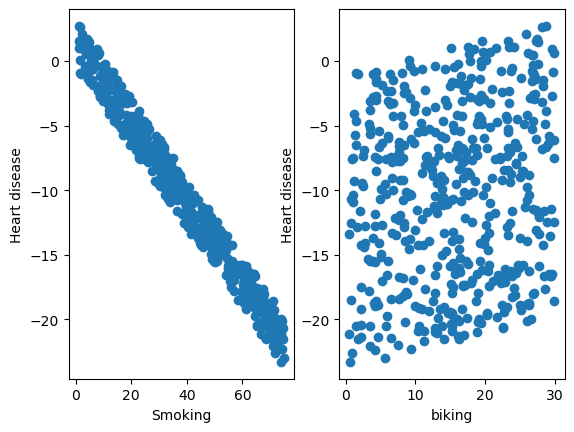

In [11]:
# Visualzising the untrained model's predicitions

with torch.inference_mode():
    plt.subplot(1,2,1)
    plt.scatter(X[:,0], model_0(X))
    plt.xlabel("Smoking")
    plt.ylabel("Heart disease")

    plt.subplot(1,2,2)
    plt.scatter(X[:,1], model_0(X))
    plt.xlabel("biking")
    plt.ylabel("Heart disease")

In [12]:
# Create training loop
epochs = 500

for epoch in range(epochs):
    model_0.train()
    
    y_preds = model_0(X_train)
    loss = loss_fn(y_preds, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model_0.eval()
    with torch.inference_mode():
        test_loss = model_0(X_test)
        test_loss = loss_fn(test_loss, y_test)
        
    if epoch%100 == 0:
        print(f"Train Loss: {loss:.5f}, Test Loss: {test_loss:.5f} ,Epoch: {epoch}")

Train Loss: 20.35622, Test Loss: 14.95061 ,Epoch: 0
Train Loss: 3.00442, Test Loss: 2.72894 ,Epoch: 100
Train Loss: 0.69353, Test Loss: 0.59897 ,Epoch: 200
Train Loss: 0.54137, Test Loss: 0.55683 ,Epoch: 300
Train Loss: 0.61942, Test Loss: 0.51531 ,Epoch: 400


In [13]:
model_0.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.2044,  0.1786]], dtype=torch.float64)),
             ('linear.bias', tensor([15.0333], dtype=torch.float64))])

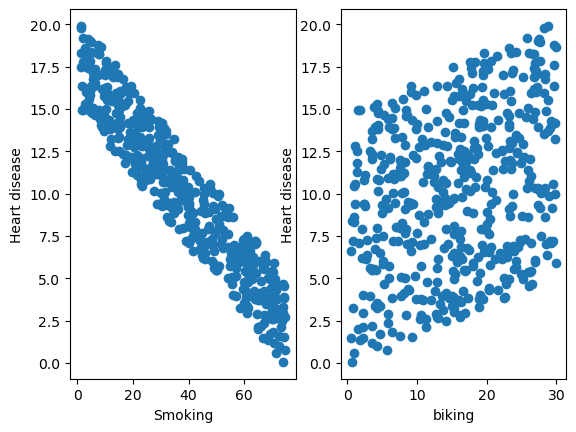

In [14]:
# Visualzising the trined model's predicitions

with torch.inference_mode():
    plt.subplot(1,2,1)
    plt.scatter(X[:,0], model_0(X))
    plt.xlabel("Smoking")
    plt.ylabel("Heart disease")

    plt.subplot(1,2,2)
    plt.scatter(X[:,1], model_0(X))
    plt.xlabel("biking")
    plt.ylabel("Heart disease")